In [1]:
import numpy as np
from scipy import stats

In [2]:
from scipy import io as spio
a = np.array([1,2,3])
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[1, 2, 3]])

In [3]:
from scipy import linalg
arr = np.array([[1, 2],[3, 4]])
linalg.det(arr)

-2.0

In [4]:
linalg.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [5]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [6]:
time_step = 0.02
period = 5
time_vec = np.arange(0,20,time_step)
sig = np.sin(2*np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)
sig

array([ 0.97155122,  0.60088392, -0.83530846,  0.34168368, -0.0913603 ,
       -0.16156165,  0.05320955,  0.42141663,  0.70221197,  0.1132379 ,
        0.63435412, -0.0591729 ,  0.49265518,  0.29234945,  0.87962631,
        0.07711968,  0.9370822 , -0.07679232, -0.71528697,  0.09827322,
        1.24399296,  0.32958474,  0.12660118,  0.05502736,  0.93783228,
        0.46779402,  0.91579669,  0.69175453,  0.06570005,  0.61729964,
       -0.13917708,  0.78856332,  1.3024898 ,  1.54168556,  0.55869097,
        0.09470551,  1.69440225,  0.34928747,  0.06266645,  1.05267848,
        1.16451784,  0.88470882,  0.3944497 ,  0.61024347, -0.59366343,
        0.33382833,  1.36653566,  1.58517729,  0.95117131,  0.44960662,
        1.28908107,  1.49359197,  1.07977713,  1.11873545,  0.58295305,
        0.84001506,  1.62812292,  0.40784722,  0.83384925,  1.10359167,
        1.03310945,  0.80636158,  1.63155294,  1.11566197,  1.95439692,
        1.13438541,  1.09123492,  1.27043398,  0.34856277,  0.71

In [7]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size,d = time_step)
sig_fft = fftpack.fft(sig)

In [8]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]
np.allclose(freq,1./period)

True

In [9]:
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)


In [10]:
import pylab as plt
plt.figure()
plt.plot(time_vec,sig)
plt.plot(time_vec,main_sig,linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

/Users/timur/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 640x480 with 1 Axes>

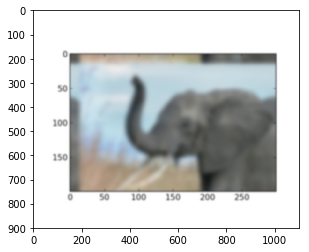

In [11]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

# read image
img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/plot_directive/intro/solutions/image_blur.hires.png")

# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.imshow(img2)
plt.show()

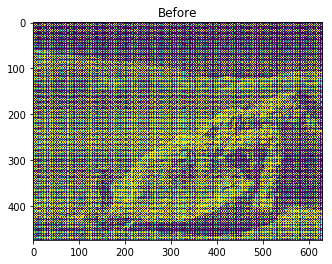

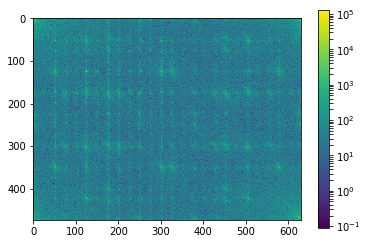

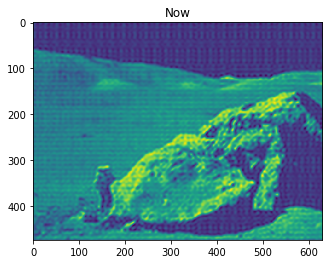

In [12]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png").astype(float)

plt.figure()
plt.imshow(img)
plt.title('Before')
plt.show()

plt.figure()
imgfft = fftpack.fft2(img)
plt.imshow(np.abs(imgfft), norm=LogNorm()) # чтобы был виден спектр нужно нормализовать
plt.colorbar()
plt.show()

#Теперь надо занулить высокочастотные части 

r,c = imgfft.shape
imgfft2 = imgfft
imgfft2[r//10:(r*9)//10]=0
imgfft2[:,c//10 : (c*9)//10]=0
#plt.figure()
#plt.imshow(np.abs(imgfft2), norm=LogNorm()) # чтобы был виден спектр нужно нормализовать
#plt.colorbar()
#plt.show()

img2 = fftpack.ifft2(imgfft2).real.astype(float)
plt.figure()
plt.imshow(img2)
plt.title('Now')
plt.show()

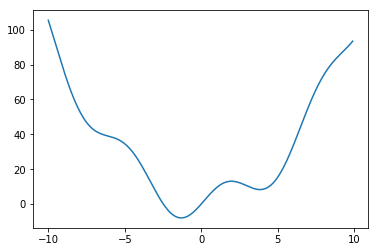

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6
[-1.30644012]
Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7
[3.83746709]
[-1.30641113]
3.8374671194983834
474


In [13]:
from scipy import optimize

def f(x) : 
    return x**2 + 10*np.sin(x)

x = np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.xticks(np.arange(-10,15,5))
plt.show()

#Градиентный спуск :

print(optimize.fmin_bfgs(f,0))

#Локальный минимум

print(optimize.fmin_bfgs(f,3))

#Поиск локального минимума не зная точки

grid = (-10,10,0.05)
xmin_global = optimize.brute(f,(grid,))
print(xmin_global)

#локальный минимум на интервале 

xmin_local = optimize.fminbound(f,0,10)
print(xmin_local)

#решение уравнений 

root = optimize.fsolve(f,1)
root2= optimize.fsolve(f,-2.5)
print(r)

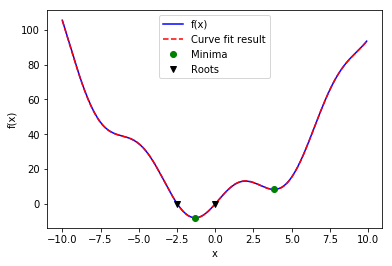

In [14]:
#Аппроксимация кривой 

xdata = np.linspace(-10,10,num = 20)
ydata = f(xdata) + np.random.randn(xdata.size)

#наименьшие квадраты 

def f2(x,a,b) :
    return a*x**2 + b*np.sin(x)

guess = [2,2]
params, params_cov = optimize.curve_fit(f2,xdata,ydata,guess)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

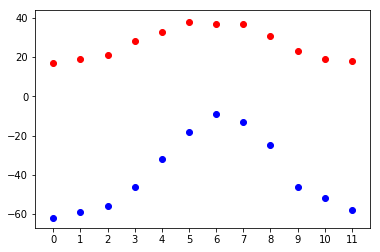

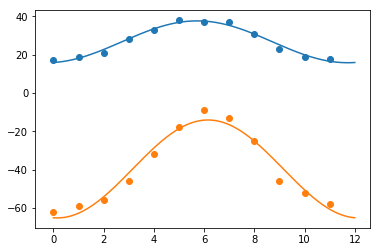

In [15]:
#Temperature 
import matplotlib.pyplot as plt
from scipy import optimize

tmin = [-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58]
tmax = [17,19,21,28,33,38,37,37,31,23,19,18]
m = np.arange(12)
plt.scatter(m,tmin,color = 'b')
plt.scatter(m,tmax,color = 'r')
plt.xticks(np.arange(0,12,1))
plt.show()

#b - амплитуда 
#a - начальное состояние 
def f3(t,a,b,tshift) :
    return a + b * np.cos((t+tshift) * np.pi / 6)
    
#используем curve_fit для поиска функции по данным f(x,theta) + eps

fmax = optimize.curve_fit(f3,m,tmax,[-60,40,0])[0]
fmin = optimize.curve_fit(f3,m,tmin,[-60,40,0])[0]

plt.figure()
days = np.arange(0,12,12/365)
plt.scatter(m,tmax)
plt.plot(days,f3(days,*fmax))
plt.scatter(m,tmin)
plt.plot(days,f3(days,*fmin))
plt.show()

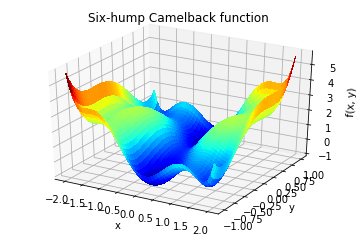

[-0.08984141  0.71265608 -1.          1.        ]


In [16]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

#plt.figure()  # simple visualization for use in tutorial
#plt.imshow(sixhump([xg, yg]))
#plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

xgrid = np.arange(-2,2,0.1)
ygrid = np.arange(-1,1,0.1)
res = optimize.minimize(sixhump,[(-2,2),(-1,1)])
print(res.x)

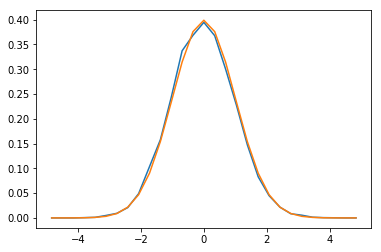

In [17]:
from scipy import stats
import pylab as pl
a = np.random.normal(size = 10000)
bins = np.linspace(-5,5,30)
histogram = np.histogram(a,bins = bins , normed = True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.norm.pdf(bins)
pl.plot(bins,histogram)
pl.plot(bins,b)
pl.show()

7.521884943996031


/Users/timur/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


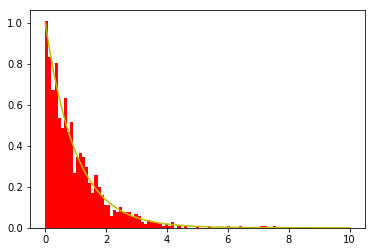

In [18]:
a = np.random.gamma(1,1,1000)
print(a.max())
bins = np.linspace(0,10,100)
pl.hist(a,bins=bins,normed = True,color = 'r')
b = stats.gamma.pdf(bins,1)
pl.plot(bins,b,color = 'y')
pl.show()

In [19]:
from scipy import ndimage
from scipy import misc


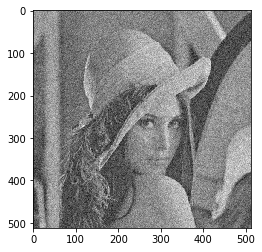

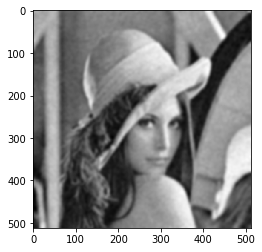

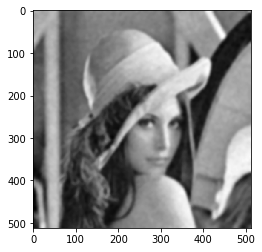

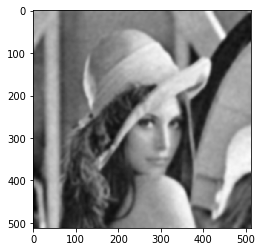

In [20]:
#Лена была удалена начиная с версии 0.17
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
import numpy as np
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
from scipy import signal
wiener_lena = signal.wiener(blurred_lena, (5,5))
plt.imshow(noisy_lena,plt.cm.gray)
plt.show()
plt.imshow(blurred_lena,plt.cm.gray)
plt.show()
plt.imshow(median_lena,plt.cm.gray)
plt.show()
plt.imshow(wiener_lena,plt.cm.gray)
plt.show()
